In [1]:
import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
import time
import mlflow
from matplotlib import rcParams
from utils import download_user_order_history, get_features_pred_by_uid_pid
rcParams.update({'figure.autolayout': True})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
print(shap.__version__)

0.35.0


In [3]:
start_time = time.time()
data_folder = 'data'
experiment_name = 'SHAP Force Plot'
pid = 39581
uid = 92665
run_name = 'userid: {} productid: {}'.format(uid, pid)

In [4]:
# load model
xgb = xgboost.XGBClassifier()
xgb.load_model('{}/xgb_model.json'.format(data_folder))

# load data
train_full_features = pd.read_pickle('{}/train_full_features.pickle'.format(data_folder))

# select instance
instance = train_full_features.loc[(train_full_features.user_id==uid)&(train_full_features['product_id']==pid)]

# download
print(instance)
download_user_order_history(uid, pid)

         user_id  order_id  product_id  reordered  up_num_purchases  \
3692888    92665   1869421       39581          1                 1   

         up_cart_order_mean  up_cart_order_std  up_cart_order_sum  \
3692888                 7.0               -1.0                  7   

         up_cart_order_min  up_cart_order_max  up_cart_order_median  \
3692888                  7                  7                   7.0   

         up_reorder_times  up_first_order  up_last_order  up_mean_order_num  \
3692888                 0               5              5                5.0   

         up_std_order_num  user_max_order  up_num_purchases_within5  \
3692888              -1.0              13                       0.0   

         up_purchase_ratio_within5  up_purchase_interval_days_mean  \
3692888                        0.0                             NaN   

         up_purchase_interval_days_median  up_purchase_interval_days_max  \
3692888                               NaN               

92665 French Vanilla Creamer  purchase history
user 92665 order history downloaded in data folder


In [5]:
# drop columns
features = train_full_features.drop(columns=['order_id', 'user_id', 'product_id', 'reordered'])
instance = instance.drop(columns=['order_id', 'user_id', 'product_id', 'reordered'])

booster = xgb.get_booster()
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda : model_bytearray

In [16]:
explainer = shap.TreeExplainer(booster, model_output='probability', data=features.head(100).values.astype(np.float64))
shap_values = explainer.shap_values(instance)
exp = explainer.expected_value
print(exp)

0.22815102114137129


In [7]:
print(instance.shape)
print(shap_values.shape)

(1, 162)
(1, 162)


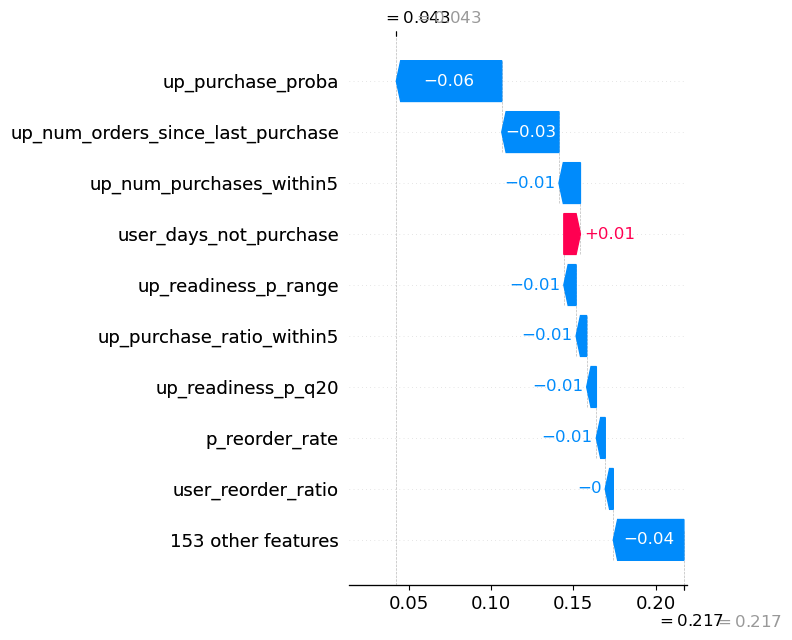

<Figure size 640x480 with 0 Axes>

In [9]:
shap.waterfall_plot(expected_value=explainer.expected_value, shap_values=shap_values[0], feature_names=instance.columns)
plt.tight_layout()
plt.show()